In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import csv # implements classes to read and write tabular data in CSV form
import matplotlib.pyplot as plt
# conda install -c anaconda beautiful-soup --yes
from bs4 import BeautifulSoup # package for parsing HTML and XML documents
print('Libraries imported.')


Libraries imported.


In [5]:
website_url = requests.get('https://en.wikipedia.org/wiki/New_York_City#Boroughs').text
soupy = BeautifulSoup(website_url,'lxml')
table = soupy.find('table',{'class':'wikitable sortable'})
headers = [header.text for header in table.find_all('th')]
table_rows = table.find_all('tr')        

rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('test11.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

In [6]:
Pop_income=pd.read_csv('test11.csv')
Pop_income.drop(Pop_income.columns[[1,6,7,8,9,10,11,12,13,14]], axis=1,inplace=True)

In [7]:
Pop_income

,New York City's five boroughsvte,Population,Gross Domestic Product,Land area,Density
0,The Bronx\n,"1,471,160\n",28.787\n,"19,570\n",42.10\n
1,Brooklyn\n,"2,648,771\n",63.303\n,"23,900\n",70.82\n
2,Manhattan\n,"1,664,727\n",629.682\n,"378,250\n",22.83\n
3,Queens\n,"2,358,582\n",73.842\n,"31,310\n",108.53\n
4,Staten Island\n,"479,458\n",11.249\n,"23,460\n",58.37\n
5,City of New York,806.863,"93,574",302.64,783.83
6,State of New York,"1,547.116","78,354","47,214","122,284"
7,Sources:[194] and see individual borough artic...,NaN,NaN,NaN,NaN


In [10]:
Pop_income = Pop_income[:5]
Pop_income.columns = Pop_income.columns.str.replace(' ', '')
Pop_income.columns = Pop_income.columns.str.replace('\'','')
Pop_income['Borough']=Pop_income['Borough'].replace(to_replace='\n', value='', regex=True)

Pop_income



,Borough,Population,gdp,la,square_km
0,The Bronx,"1,471,160\n",28.787\n,"19,570\n",42.10\n
1,Brooklyn,"2,648,771\n",63.303\n,"23,900\n",70.82\n
2,Manhattan,"1,664,727\n",629.682\n,"378,250\n",22.83\n
3,Queens,"2,358,582\n",73.842\n,"31,310\n",108.53\n
4,Staten Island,"479,458\n",11.249\n,"23,460\n",58.37\n


In [9]:
Pop_income.rename(columns = {'NewYorkCitysfiveboroughsvte\n' : 'Borough',
                   'Population\n':'Population', 
                   'Landarea\n':'la',
                    'Density\n':'square_km',
                            'GrossDomesticProduct\n':'gdp'}, inplace=True)



Pop_income

/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Borough,Population,gdp,la,square_km
0,The Bronx\n,"1,471,160\n",28.787\n,"19,570\n",42.10\n
1,Brooklyn\n,"2,648,771\n",63.303\n,"23,900\n",70.82\n
2,Manhattan\n,"1,664,727\n",629.682\n,"378,250\n",22.83\n
3,Queens\n,"2,358,582\n",73.842\n,"31,310\n",108.53\n
4,Staten Island\n,"479,458\n",11.249\n,"23,460\n",58.37\n


In [11]:

Pop_income['Borough']=Pop_income['Borough'].replace(to_replace='\n', value='', regex=True)
Pop_income['Population']=Pop_income['Population'].replace(to_replace='\n', value='', regex=True)
Pop_income['gdp']=Pop_income['gdp'].replace(to_replace='\n', value='', regex=True)
Pop_income['la']=Pop_income['la'].replace(to_replace='\n', value='', regex=True)
Pop_income['square_km']=Pop_income['square_km'].replace(to_replace='\n', value='', regex=True)

Pop_income

,Borough,Population,gdp,la,square_km
0,The Bronx,"1,471,160",28.787,"19,570",42.10
1,Brooklyn,"2,648,771",63.303,"23,900",70.82
2,Manhattan,"1,664,727",629.682,"378,250",22.83
3,Queens,"2,358,582",73.842,"31,310",108.53
4,Staten Island,"479,458",11.249,"23,460",58.37


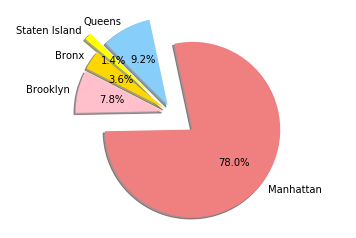

In [12]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'
sizes = Pop_income['gdp']
colors = ['gold', 'pink', 'lightcoral', 'lightskyblue', 'yellow']
explode = (0.1, 0.1, 0.3, 0.1, 0.3)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

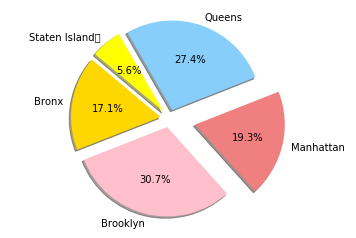

In [13]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island	'
sizes = [1471.160, 2648.771, 1664.727, 2358.582, 479.458]
colors = ['gold', 'pink', 'lightcoral', 'lightskyblue', 'yellow']
explode = (0.1, 0.1, 0.3, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [14]:
markets=pd.read_csv('DOHMH_Farmers_Markets_and_Food_Boxes.csv')
markets.head()

,FacilityName,Service Category,Service Type,Address,Address 2,Borough,ZipCode,Latitude,Longitude,AdditionalInfo,StartDate,EndDate,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Accepts EBT,NYC Dept of Health Cooking Demonstrations,Open Year-Round,Website,Location Point
0,Inwood Park Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,Isham St bet Seaman & Cooper,NaN,Manhattan,10034,40.869009,-73.920320,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8am-3pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.8690087167, -73.9203204394)"
1,82nd Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,82nd St bet 1st & York Aves,NaN,Manhattan,10028,40.773448,-73.948954,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9am-2:30pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.7734483572999, -73.9489535725)"
2,1 Centre Street,Farmers Markets and Food Boxes,Food Boxes,1 Centre Street,"South Building, 9th Floor",Manhattan,11101,40.713028,-74.003753,Open year-round,NaN,NaN,NaN,NaN,NaN,2:00 pm - 6:00 pm,NaN,NaN,NaN,True,False,True,https://www.grownyc.org/greenmarketco/foodbox,"(40.7130276, -74.0037529)"
3,125th Street Farmers Market,Farmers Markets and Food Boxes,Farmers Markets,125th St & Adam Clayton Powell Jr Blvd,NaN,Manhattan,10027,40.808981,-73.948327,Market open dates: 6/13/2017 to 11/21/2017,06/13/2017,11/21/2017,NaN,10am-7pm,NaN,NaN,NaN,NaN,NaN,True,False,False,https://www.grownyc.org/greenmarket,"(40.8089813746999, -73.9483266703999)"
4,170 Farm Stand,Farmers Markets and Food Boxes,Farmers Markets,170th St & Townsend Ave,NaN,Bronx,10452,40.840095,-73.916827,Market open dates: 7/5/2017 to 11/22/2017,07/05/2017,11/22/2017,NaN,NaN,2:30pm-6:30pm,NaN,NaN,NaN,NaN,True,False,False,NaN,"(40.840095, -73.916827)"


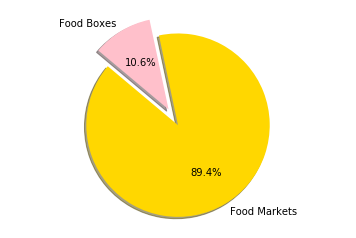

In [15]:
markets['Service Type'].value_counts().to_frame()
labels = 'Food Markets', 'Food Boxes'
sizes = [144,17]
colors = ['gold', 'pink']
explode = (0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [16]:
markets_fm = markets[markets['Service Type'] == 'Farmers Markets'].copy()
markets_fm ['Borough'] = markets_fm['Borough']
markets_fm ['Borough'] = markets_fm['Borough'].map(lambda x: x.strip())
markets_fm.head()

,FacilityName,Service Category,Service Type,Address,Address 2,Borough,ZipCode,Latitude,Longitude,AdditionalInfo,StartDate,EndDate,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Accepts EBT,NYC Dept of Health Cooking Demonstrations,Open Year-Round,Website,Location Point
0,Inwood Park Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,Isham St bet Seaman & Cooper,NaN,Manhattan,10034,40.869009,-73.920320,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8am-3pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.8690087167, -73.9203204394)"
1,82nd Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,82nd St bet 1st & York Aves,NaN,Manhattan,10028,40.773448,-73.948954,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9am-2:30pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.7734483572999, -73.9489535725)"
3,125th Street Farmers Market,Farmers Markets and Food Boxes,Farmers Markets,125th St & Adam Clayton Powell Jr Blvd,NaN,Manhattan,10027,40.808981,-73.948327,Market open dates: 6/13/2017 to 11/21/2017,06/13/2017,11/21/2017,NaN,10am-7pm,NaN,NaN,NaN,NaN,NaN,True,False,False,https://www.grownyc.org/greenmarket,"(40.8089813746999, -73.9483266703999)"
4,170 Farm Stand,Farmers Markets and Food Boxes,Farmers Markets,170th St & Townsend Ave,NaN,Bronx,10452,40.840095,-73.916827,Market open dates: 7/5/2017 to 11/22/2017,07/05/2017,11/22/2017,NaN,NaN,2:30pm-6:30pm,NaN,NaN,NaN,NaN,True,False,False,NaN,"(40.840095, -73.916827)"
5,175th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,175th St bet Wadsworth Ave & Broadway,NaN,Manhattan,10033,40.845956,-73.937813,Market open dates: 6/29/2017 to 11/30/2017,06/29/2017,11/30/2017,NaN,NaN,NaN,8am-5pm,NaN,NaN,NaN,True,True,False,https://www.grownyc.org/greenmarket,"(40.8459557405, -73.9378126725)"


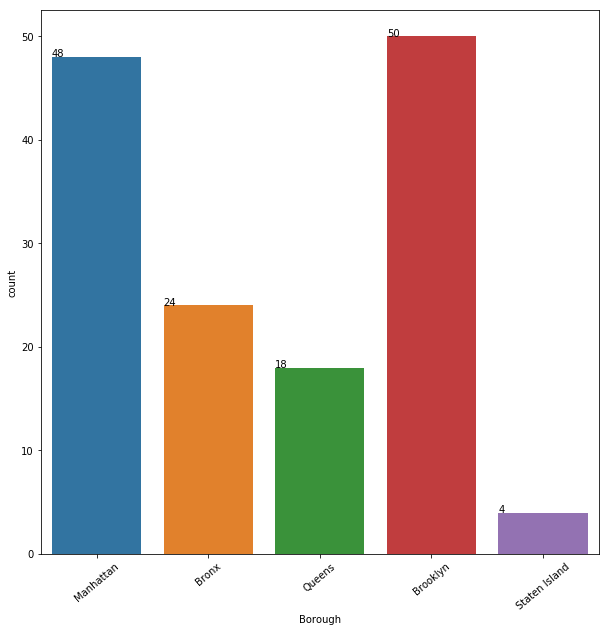

In [17]:
import seaborn as sns

fig,ax = plt.subplots(1, 1, figsize=(10, 10))
sns.countplot(x='Borough',data=markets_fm)
for s in ax.patches:
    if (np.isnan(float(s.get_height()))):
        ax.annotate('', (s.get_x(), 0))
    else:
        ax.annotate(str(format(int(s.get_height()))), (s.get_x(), s.get_height()))
        ax.set_xticklabels([s.get_text().split("T")[0] for s in ax.get_xticklabels()])

plt.xticks(rotation=400) 
plt.show()

In [18]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
lat = location.latitude
long = location.longitude
mappers = folium.Map(location=[lat, long], zoom_start=11)

for lat, lng, FacilityName, borough in zip(markets_fm['Latitude'], markets_fm['Longitude'], markets_fm['FacilityName'], markets_fm['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill_color='blue',
                fill_opacity=0.5,
                parse_html = False).add_to(mappers)  

mappers

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [20]:
pop1=pd.read_csv('pop1.csv')
pop1['Borough'].value_counts()


Queens           81
Brooklyn         70
Staten Island    63
Bronx            52
Manhattan        40
Name: Borough, dtype: int64

In [21]:
data3 = pop1.loc[(pop1['Borough'] == 'Manhattan')|(pop1['Borough'] == 'Brooklyn')|(pop1['Borough'] == 'Queens')]
data3.head()

,Borough,Neighborhood,Latitude,Longitude
6,Manhattan,Marble Hill,40.876551,-73.910660
46,Brooklyn,Bay Ridge,40.625801,-74.030621
47,Brooklyn,Bensonhurst,40.611009,-73.995180
48,Brooklyn,Sunset Park,40.645103,-74.010316
49,Brooklyn,Greenpoint,40.730201,-73.954241


In [22]:
data3.reset_index(drop=True)

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Brooklyn,Bay Ridge,40.625801,-74.030621
2,Brooklyn,Bensonhurst,40.611009,-73.995180
3,Brooklyn,Sunset Park,40.645103,-74.010316
4,Brooklyn,Greenpoint,40.730201,-73.954241
5,Brooklyn,Gravesend,40.595260,-73.973471
6,Brooklyn,Brighton Beach,40.576825,-73.965094
7,Brooklyn,Sheepshead Bay,40.586890,-73.943186
8,Brooklyn,Manhattan Terrace,40.614433,-73.957438
9,Brooklyn,Flatbush,40.636326,-73.958401


In [23]:
CLIENT_ID = '3BTXCSLDML4CUWEZODUVR3HJHYKTXJEJHJKGDZYDU4ADBWHA' # your Foursquare ID
CLIENT_SECRET = '4EF2EWAYCVQ24WSN4FF05FQAQRAUB3E00MDW2CX2PXUOWID4' # your Foursquare Secret
VERSION = '20181218' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3BTXCSLDML4CUWEZODUVR3HJHYKTXJEJHJKGDZYDU4ADBWHA
CLIENT_SECRET:4EF2EWAYCVQ24WSN4FF05FQAQRAUB3E00MDW2CX2PXUOWID4


In [24]:
def get_Venues(names, latitudes, longitudes, LIMIT=100, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
venues = get_Venues(names=data3['Neighborhood'],
                                  latitudes=data3['Latitude'],
                                  longitudes=data3['Longitude'],
                                  LIMIT=100)

print('"venues" dataframe has {} venues and {} corresponding unique venues.'.format(
      len(venues['Venue Category']),
      len(venues['Venue Category'].unique())))

venues.head()

Marble Hill
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [26]:
venues.to_csv('venues.csv', sep=',')

In [27]:
venues.groupby('Venue Category')['Venue'].count().sort_values()

Venue Category
Zoo                                           1
Government Building                           1
Burmese Restaurant                            1
Gun Range                                     1
Heliport                                      1
Insurance Office                              1
Bridal Shop                                   1
Kitchen Supply Store                          1
Kofte Place                                   1
Lighthouse                                    1
Modern Greek Restaurant                       1
National Park                                 1
College Basketball Court                      1
Pastry Shop                                   1
Photography Studio                            1
Piano Bar                                     1
Golf Driving Range                            1
Piercing Parlor                               1
Go Kart Track                                 1
General Travel                                1
College Cafeteria        

In [28]:
# one hot encoding
one_hot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

column_names = ['Neighborhood'] + list(one_hot.columns)
one_hot['Neighborhood'] = venues['Neighborhood'] 
one_hot = one_hot[column_names]

one_hot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,College Gym,College Residence Hall,College Theater,College Track,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cruise,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Kofte Place,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Neighborhood,New Am

In [29]:
restaurant_lst = []
fnd = 'Rest'
for i in one_hot.columns :
    if fnd in i:
        restaurant_lst.append(i)
restaurant_lst        

['Afghan Restaurant',
 'African Restaurant',
 'American Restaurant',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Austrian Restaurant',
 'Brazilian Restaurant',
 'Burmese Restaurant',
 'Cajun / Creole Restaurant',
 'Cambodian Restaurant',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Caucasian Restaurant',
 'Chinese Restaurant',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Cuban Restaurant',
 'Czech Restaurant',
 'Dim Sum Restaurant',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Egyptian Restaurant',
 'Empanada Restaurant',
 'English Restaurant',
 'Ethiopian Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'French Restaurant',
 'German Restaurant',
 'Gluten-free Restaurant',
 'Greek Restaurant',
 'Halal Restaurant',
 'Hawaiian Restaurant',
 'Himalayan Restaurant',
 'Hotpot Restaurant',
 'Indian Restaurant',
 'Indonesian Restaurant',
 'Israeli Restaurant',
 'Italian Rest

In [30]:
col_name = ['Neighborhood'] + restaurant_lst
restaurant = one_hot[col_name]
restaurant = restaurant.iloc[:,1::]

In [31]:
restaurant_all = restaurant.groupby('Neighborhood').sum().reset_index()
restaurant_all['Total'] = restaurant_all .sum(axis=1)

In [32]:
# set number of clusters
kclusters = 3

clustering = restaurant_all.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2], dtype=int32)

In [33]:
results = pd.DataFrame(kmeans.cluster_centers_)
results.columns = clustering.columns
results.index = ['cluster0','cluster1','cluster2']
results['Total Sum'] = results.sum(axis = 1)
results

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Rest Area,Restaurant,Romanian Restaurant,Russian Restaurant,Salvadoran Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Total,Total Sum
cluster0,0.014286,0.014286,0.485714,9.714451e-17,1.387779e-16,0.171429,-5.551115e-17,6.245005e-17,9.714451e-17,-2.602085e-18,2.775558e-17,-2.428613e-17,-4.163336e-17,1.028571,-2.775558e-17,1.171429,0.014286,0.014286,0.028571,-2.428613e-17,-2.428613e-17,0.014286,0.042857,-2.602085e-18,4.163336e-17,-5.204170e-18,-9.714451e-17,0.014286,0.885714,-4.163336e-17,0.028571,0.042857,1.428571e-02,0.100000,0.028571,0.014286,-4.857226e-17,-2.081668e-17,0.214286,-1.040834e-17,-1.040834e-17,0.714286,6.245005e-17,0.257143,-2.428613e-17,-5.204170e-18,0.100000,-2.775558e-17,0.371429,-4.857226e-17,4.163336e-17,0.100000,0.185714,0.114286,-2.602085e-18,-5.204170e-18,-2.775558e-17,0.042857,-2.602085e-18,1.428571e-02,-2.428613e-17,0.057143,-1.040834e-17,1.428571e-02,-8.326673e-17,4.285714e-02,0.271429,1.428571e-02,0.042857,-2.428613e-17,-2.602085e-18,0.257143,-2.602085e-18,1.249001e-16,-2.428613e-17,0.128571,0.100000,0.114286,-2.428613e-17,0.242857,-2.602085e-18,4.163336e-17,0.014286,1.110223e-16,1.428571e-02,0.114286,4.163336e-17,0.014286,-1.040834e-17,-2.602085e-18,0.042857,-5.204170e-18,0.028571,7.757143,15.514286
cluster1,0.012658,0.037975,1.506329,1.012658e-01,1.392405e-01,0.506329,7.594937e-02,6.329114e-02,8.860759e-02,1.265823e-02,6.329114e-02,2.531646e-02,1.139241e-01,0.873418,5.063291e-02,1.468354,0.037975,0.088608,0.177215,2.531646e-02,2.531646e-02,0.063291,0.227848,1.265823e-02,5.063291e-02,2.531646e-02,5.063291e-02,0.164557,0.759494,6.329114e-02,0.860759,0.113924,-3.469447e-18,0.379747,0.075949,0.012658,1.265823e-02,1.265823e-02,0.645570,-1.387779e-17,1.265823e-02,2.417722,5.063291e-02,1.101266,-2.775558e-17,1.265823e-02,0.202532,5.063291e-02,0.746835,2.531646e-02,3.797468e-02,0.455696,1.316456,0.417722,-3.469447e-18,2.531646e-02,3.797468e-02,0.405063,-3.469447e-18,2.531646e-02,1.265823e-02,0.215190,5.063291e-02,-3.469447e-18,1.392405e-01,-1.387779e-17,0.708861,-3.469447e-18,0.164557,1.265823e-02,1.265823e-02,0.822785,1.265823e-02,1.012658e-01,-2.775558e-17,0.253165,0.227848,0.253165,2.531646e-02,1.151899,1.265823e-02,1.265823e-02,0.012658,1.645570e-01,-3.469447e-18,0.6582

In [34]:
results= pd.DataFrame(restaurant_all['Neighborhood'])

results['Total'] = restaurant_all['Total']
results = results.assign(Labels = kmeans.labels_)

In [35]:
results

,Neighborhood,Total,Labels
0,Arverne,4,0
1,Astoria,28,1
2,Astoria Heights,8,0
3,Auburndale,34,2
4,Bath Beach,33,2
5,Battery Park City,8,0
6,Bay Ridge,34,2
7,Bay Terrace,9,0
8,Bayside,31,2
9,Bayswater,1,0


In [36]:
vis = data3
vis = vis.join(results.set_index('Neighborhood'), on='Neighborhood')
vis.head()

,Borough,Neighborhood,Latitude,Longitude,Total,Labels
6,Manhattan,Marble Hill,40.876551,-73.910660,13,0
46,Brooklyn,Bay Ridge,40.625801,-74.030621,34,2
47,Brooklyn,Bensonhurst,40.611009,-73.995180,28,1
48,Brooklyn,Sunset Park,40.645103,-74.010316,39,2
49,Brooklyn,Greenpoint,40.730201,-73.954241,22,1


### cluster with 3 labels 

In [38]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

map_clusters = folium.Map(location=[lat, long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vis['Latitude'], vis['Longitude'], vis['Neighborhood'], vis['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters